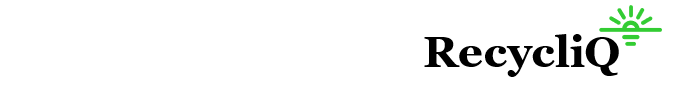

# **Research Project**
### OLUWATOBI EKUNDAYO - x19173105
#### MSc. Data Analytics, National College of Ireland

## **Experiment 1: Replicate ``State-of-the-art model`` with ORIGINAL dataset**





### **Import Packages**

In [1]:
#Install the package if it hasn't been installed on your colab before.
#!pip install scikit-learn

In [2]:
import tensorflow as tf
import pandas as pd
assert tf.__version__.startswith('2')

import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from scipy import stats
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# use seaborn plotting defaults
import seaborn as sns; sns.set_theme()

tf.__version__

'2.3.0'

### **Setting Up Input Connection To Google Drive**

In [3]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth
from oauth2client.client import GoogleCredentials

**Get google drive authentication code**

In [4]:
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

**Set path to extract file from gdrive**

In [5]:
fid = drive.ListFile({'q':"title='trashnet_dataset.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('trashnet_dataset.zip')

**Unzip the file from google drive**

In [6]:
!unzip \*.zip  && rm *.zip 

Archive:  trashnet_dataset.zip
   creating: trashnet_dataset/
   creating: trashnet_dataset/cardboard/
  inflating: trashnet_dataset/cardboard/cardboard1.jpg  
  inflating: trashnet_dataset/cardboard/cardboard10.jpg  
  inflating: trashnet_dataset/cardboard/cardboard100.jpg  
  inflating: trashnet_dataset/cardboard/cardboard101.jpg  
  inflating: trashnet_dataset/cardboard/cardboard102.jpg  
  inflating: trashnet_dataset/cardboard/cardboard103.jpg  
  inflating: trashnet_dataset/cardboard/cardboard104.jpg  
  inflating: trashnet_dataset/cardboard/cardboard105.jpg  
  inflating: trashnet_dataset/cardboard/cardboard106.jpg  
  inflating: trashnet_dataset/cardboard/cardboard107.jpg  
  inflating: trashnet_dataset/cardboard/cardboard108.jpg  
  inflating: trashnet_dataset/cardboard/cardboard109.jpg  
  inflating: trashnet_dataset/cardboard/cardboard11.jpg  
  inflating: trashnet_dataset/cardboard/cardboard110.jpg  
  inflating: trashnet_dataset/cardboard/cardboard111.jpg  
  inflating: tra

### **Setup Input Pipeline**
Delete the .txt or .json files from Colab Files before running this code

In [7]:
PATH = "/content/trashnet_dataset"
dirs = os.listdir(PATH)
for file in dirs:
  print (file)

cardboard
plastic
glass
trash
paper
metal


**Dataset Summary**

In [8]:
from pathlib import Path

ds = len(dirs)
data_dir = Path(PATH)
image_count = len(list(data_dir.glob('*/*.jpg')))
print("There are a total of " + str(image_count) +
      " Images and " + str(ds) + " Classes in this dataset.")

There are a total of 2527 Images and 6 Classes in this dataset.


### **Preparing the data**

Use **`ImageDataGenerator`** to rescale the images to **train and validation generator**.

In [9]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.3)

train_generator = datagen.flow_from_directory(
    PATH,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    seed=20,
    subset='training')

val_generator = datagen.flow_from_directory(
    PATH,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    seed=20,
    subset='validation')

Found 1771 images belonging to 6 classes.
Found 756 images belonging to 6 classes.


**Extract converted ML Image/Label for the Training and Test data**

In [10]:
for image_train, label_train in train_generator:
  break
Xtrain = image_train
ytrain = label_train
# Get Shape
image_train.shape, label_train.shape

((32, 256, 256, 3), (32, 6))

In [11]:
for image_test, label_test in val_generator:
  break
Xtest = image_test
ytest = label_test
# Get Shape
image_test.shape, label_test.shape

((32, 256, 256, 3), (32, 6))

**Visualise the data**

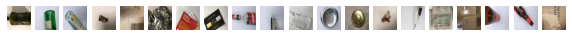

In [12]:
sample_training_images, _ = next(train_generator)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 20, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout
    plt.show()

plotImages(sample_training_images[:20])

**Save the labels in a file which will be downloaded later.**

In [13]:
print (train_generator.class_indices)
wastelabels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('wastelabels.txt', 'w') as f:
  f.write(wastelabels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [14]:
!cat wastelabels.txt

cardboard
glass
metal
paper
plastic
trash

In [15]:
ab = sorted(train_generator.class_indices.keys())
label_names =np.array(list(ab))
kb = sorted(val_generator.class_indices.keys())
labelval_names =np.array(list(kb))
type(labelval_names)

numpy.ndarray

### **Support Vector Machines (SVM)**

**Reshaping the Train and Test data**

In [16]:
# When using size 224 reshape with (32*6,112*224)
# When using size 256 reshape with (32*6,128*256)

X_train = Xtrain.reshape(32*6,128*256)
X_test = Xtest.reshape(32*6,128*256)

y_train = ytrain.flatten()
y_test = ytest.flatten()

#Create a svm Classifier
clf = SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

**Evaluation Metrics**

In [17]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# SVM Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# SVM Model Precision
print("\nPrecision:",metrics.precision_score(y_test, y_pred))
# SVM Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6875

Precision: 0.20833333333333334
Recall: 0.3125


**Converting numerical labels to categorical format**

In [18]:
def ToCategory(zz):
    bb=0
    jj=list()
    
    for n in zz:
        if (n == [1., 0., 0., 0., 0., 0.]):
            bb = 0
        if (n == [0., 1., 0., 0., 0., 0.]):
            bb = 1
        if (n == [0., 0., 1., 0., 0., 0.]):
            bb = 2
        if (n == [0., 0., 0., 1., 0., 0.]):
            bb = 3
        if (n == [0., 0., 0., 0., 1., 0.]):
            bb = 4
        if (n == [0., 0., 0., 0., 0., 1.]):
            bb = 5
        jj.append(bb)
    kk = np.asarray(jj)
    return kk

# Convert test label to category format
cc = ytest.tolist()
yTEST = ToCategory(cc)

**Display the confusion matrix between the classes**

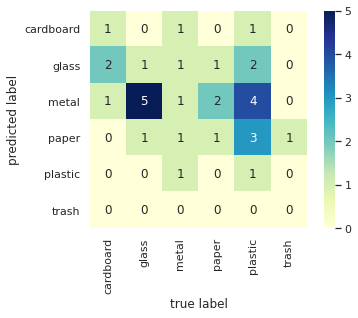

In [19]:
from sklearn.metrics import confusion_matrix

# Convert prediction label to category format
yy = y_pred.reshape(32,6)
dd = yy.tolist()
yPRED = ToCategory(dd)

mat = confusion_matrix(yTEST, yPRED)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="YlGnBu", cbar=True,
            xticklabels=label_names,
            yticklabels=label_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### **Using PCA (feature extraction) + SVM (Classifier) Model**

In [20]:
# Set PCA for feature extraction
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
# Set SVM for classification
svc = SVC(kernel='rbf', class_weight='balanced')
# Setup the model
model = make_pipeline(pca, svc)

Use **``grid search cross-validation``** to explore combinations of parameters.
Here we will adjust **``C``** (which controls the margin hardness) and **``gamma``** (which controls the size of the radial basis function kernel), and determine the best model:

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid, cv=5)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 2min 9s, sys: 17 s, total: 2min 26s
Wall time: 1min 14s
{'svc__C': 5, 'svc__gamma': 0.005}


**``The optimal values from the grid search falls toward the middle of the grid``**

**Using the cross-validated model** - Predict the labels for the test data, which the model has not yet seen.

In [22]:
model = grid.best_estimator_
yfit = model.predict(X_test)

**Evaluation Metrics**

In [23]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, yfit))

Accuracy: 0.765625


**Using the classification report we evaluate the estimator's performance**

In [24]:
from sklearn.metrics import classification_report

# Convert prediction label to category format
gg = yfit.reshape(32,6)
pp = gg.tolist()
yFIT = ToCategory(pp)

print(classification_report(yTEST, yFIT, target_names=label_names))

              precision    recall  f1-score   support

   cardboard       0.25      0.50      0.33         4
       glass       0.12      0.14      0.13         7
       metal       0.00      0.00      0.00         5
       paper       0.25      0.25      0.25         4
     plastic       0.00      0.00      0.00        11
       trash       0.00      0.00      0.00         1

    accuracy                           0.12        32
   macro avg       0.10      0.15      0.12        32
weighted avg       0.09      0.12      0.10        32



**Display the confusion matrix between the classes**

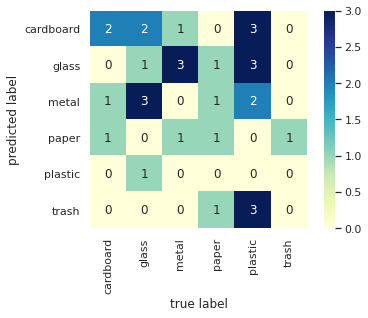

In [25]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(yTEST, yFIT)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="YlGnBu", cbar=True,
            xticklabels=label_names,
            yticklabels=label_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

**Let's take a look at a few of the test images along with their predicted values:**

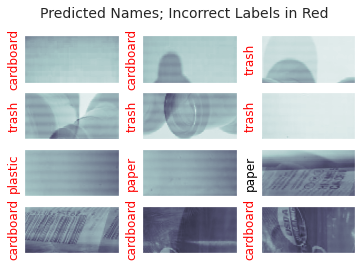

In [33]:
fig, ax = plt.subplots(4, 3)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(128, 256), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(label_names[yFIT[i]].split()[-1],
                   color='black' if yFIT[i] == yTEST[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

### **Summary**

*  *``Experiment 1``* carried out on the state-of-the-art model with the original dataset used *``Support Vector Machines``*. 

*  This model produced an *``accuracy of 63%.``*